In [1]:
import datetime
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from matplotlib import style
from subprocess import check_output

import models
import utils
import visuals

warnings.filterwarnings("ignore")
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
print('Welcome.')
input_dir = 'input'
print('Choose a file from the following list: \n')
print(check_output(["ls", input_dir]).decode("utf8"))

Welcome.
Choose a file from the following list: 

bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
omisego_price.csv
qtum_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



In [3]:
print('Enter Currency File Name: ')
# name = input()
name = 'bitcoin_price.csv'

x_train, x_test, x_recent, y_train, y_test, df = utils.load_data(input_dir, name)

def print_summary(x_train, x_test, x_recent, y_train, y_test, df):
    print('=================================================')
    print('Date of newest data: {}'.format(df.index[0]))
    print('Date of oldest data: {}\n'.format(df.index[-1]))

    # Dataset shapes 
    print(x_train.shape[0], 'training samples.' )
    print(x_test.shape[0], 'test samples.' )
    print('Predicting {} days'.format(x_recent.shape[0]))
    print('Train sample shape: ', x_train.shape)
    print('Test sample shape: ', x_test.shape)
    print('Train label shape:', y_train.shape)
    print('Test label shape:', y_test.shape)
    # sample data statistics
    print('Sample Data: ')
    print(df.describe())
    
print_summary(x_train, x_test, x_recent, y_train, y_test, df)

Enter Currency File Name: 
Date of newest data: 2013-04-28 00:00:00
Date of oldest data: 2017-08-21 00:00:00

1261 training samples.
316 test samples.
Predicting 15 days
Train sample shape:  (1261, 6)
Test sample shape:  (316, 6)
Train label shape: (1261,)
Test label shape: (316,)
Sample Data: 
              Open         High          Low        Close       HL_PCT  \
count  1577.000000  1577.000000  1577.000000  1577.000000  1577.000000   
mean    622.577457   639.581046   606.535016   624.897413     4.767951   
std     626.684013   650.853367   605.868482   632.125508     5.015124   
min      68.500000    74.560000    65.530000    68.430000     0.000000   
25%     256.490000   261.800000   251.880000   257.060000     1.722388   
50%     442.840000   449.770000   435.180000   442.690000     3.224758   
75%     671.460000   684.840000   653.890000   672.780000     5.946746   
max    4384.440000  4484.700000  4243.710000  4376.630000    59.821077   

        PCT_Change        label  
cou

# Support Vector Regression

Support Vector Regression model selected.

Training initiated...

Training Complete..
Support Vector Regression Model Training Accuracy: 93.06470445716761%

Evaluating model on test data...

Support Vector Regression Model Accuracy: 94.74441046858699%

Predicting future values...

Predicted Values: [ 3964.10748452  4128.07930673  4234.81219517  4348.35687277  4322.16032252
  4346.69705894  4328.72840122  4474.09170049  4536.60142553  4620.32593769
  4775.78766327  4696.83979796  4553.6246616   4348.1489412   4245.81695509]
Forecast Plot


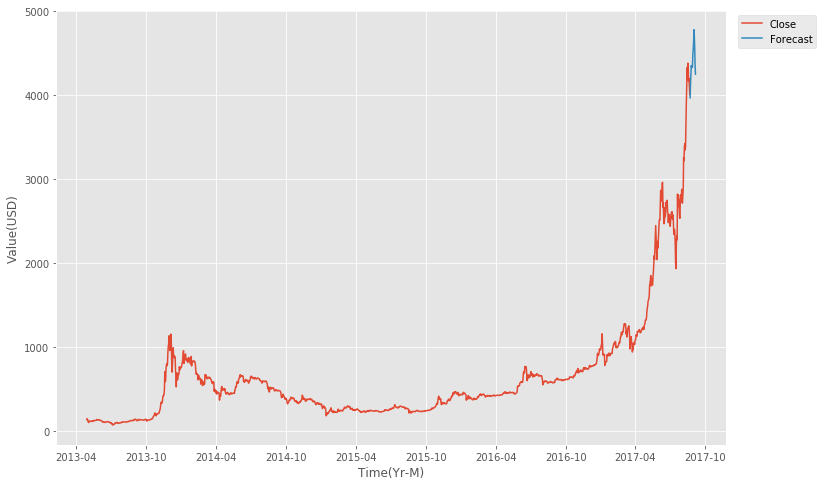

In [4]:
support_vector_regression = models.SVR(x_train, y_train, x_test, y_test, x_recent)
print('Support Vector Regression model selected.\n')

# train
print('Training initiated...\n')
support_vector_regression.train()

# test
print('\nEvaluating model on test data...\n')
support_vector_regression.test()

# predict
print('\nPredicting future values...\n')
preds = support_vector_regression.predict()

# graph predictions
print('Forecast Plot')
utils.forecast_plot(df, preds)

# Linear Regression

Linear Regression model.
Linear Regression model selected.

Training initiated...

Training Complete..
Linear Regression Model Training Accuracy: 95.06704473618377%

Evaluating model on test data...

Linear Regression Model Accuracy: 94.96835919968815%

Predicting future values...


Predicted Values: [ 4482.52255987  4719.87806523  4880.39596449  4963.10608116  4899.41513281
  4958.69937813  4901.20922885  5147.88959889  5152.68591137  5309.7382816
  5496.47699716  5193.48391595  5162.07910706  4773.05579517  4837.10619129]

Forecast Plot


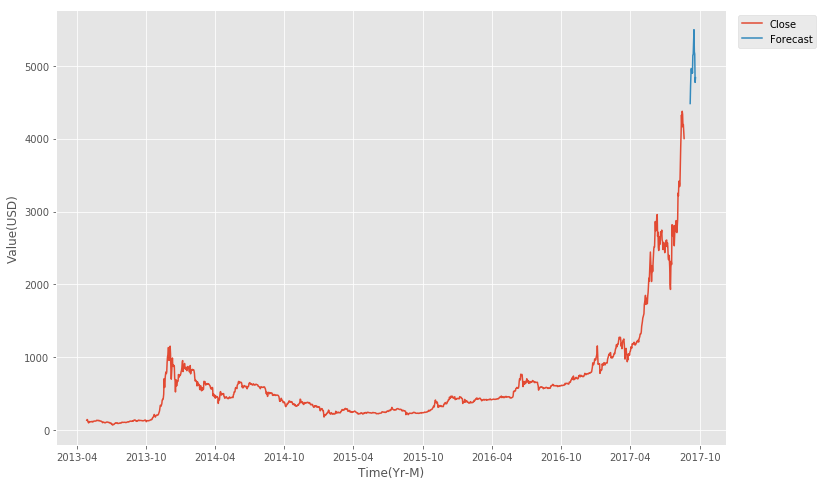

In [5]:
print('Linear Regression model.')
linear_regression = models.LR(x_train, y_train, x_test, y_test, x_recent)
print('Linear Regression model selected.\n')

# train
print('Training initiated...\n')
linear_regression.train()

# test
print('\nEvaluating model on test data...\n')
linear_regression.test()

# predict
print('\nPredicting future values...\n')
preds = linear_regression.predict()

# graph predictions
print('Forecast Plot')
utils.forecast_plot(df, preds)

# Multi Layer Perceptron

Linear Regression model.
Linear Regression model selected.

Training initiated...

Epoch 1/10
0s - loss: 679807.3970 - mean_squared_error: 679807.3970
Epoch 2/10
0s - loss: 64307.5760 - mean_squared_error: 64307.5760
Epoch 3/10
0s - loss: 44004.5765 - mean_squared_error: 44004.5765
Epoch 4/10
0s - loss: 36749.5484 - mean_squared_error: 36749.5484
Epoch 5/10
0s - loss: 35410.5216 - mean_squared_error: 35410.5216
Epoch 6/10
0s - loss: 34380.6525 - mean_squared_error: 34380.6525
Epoch 7/10
0s - loss: 34919.1236 - mean_squared_error: 34919.1236
Epoch 8/10
0s - loss: 30291.6600 - mean_squared_error: 30291.6600
Epoch 9/10
0s - loss: 29836.9807 - mean_squared_error: 29836.9807
Epoch 10/10
0s - loss: 29790.4344 - mean_squared_error: 29790.4344
Training Complete..

Evaluating model on test data...


Predicting future values...


Predicted Values: [[ 4676.47753906]
 [ 4888.09082031]
 [ 5031.60742188]
 [ 5157.59375   ]
 [ 5123.69042969]
 [ 5161.39550781]
 [ 5126.28320312]
 [ 5319.78857422]
 [ 538

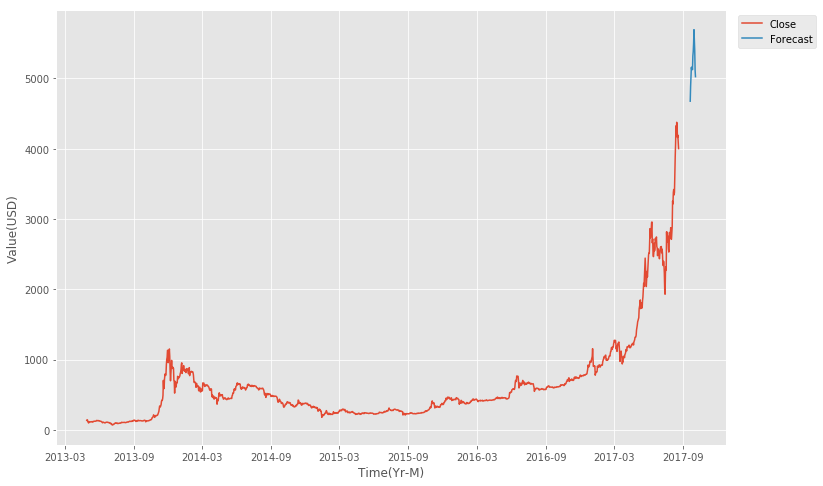

In [6]:
print('Linear Regression model.')
mlp = models.MLP(x_train, y_train, x_test, y_test, x_recent)
print('Linear Regression model selected.\n')
mlp.build()
# train
print('Training initiated...\n')
mlp.train()
# test
print('\nEvaluating model on test data...\n')
mlp.test()
# predict
print('\nPredicting future values...\n')
preds = mlp.predict()
# graph predictions
print('Forecast Plot')
utils.forecast_plot(df, preds)

# Gradient Boosting Regression

Gradient Boosting Regression model.
Gradient Boosting Regression model selected.

Training initiated...

Training Complete..
Gradient Boosting Regression Model Training Accuracy: 98.94952312424027%

Evaluating model on test data...

Gradient Boosting Regression Model Accuracy: 95.15890726347219%

Predicting future values...

Predicted Values: [ 4271.94186746  4471.83142385  4704.19372756  4696.81981129  4535.76980792
  4464.14639646  4697.77979542  4772.90918961  4759.05052541  4717.325264
  4717.325264    4737.47384935  4709.80091402  4573.67473197  4606.78281386]
Forecast Plot


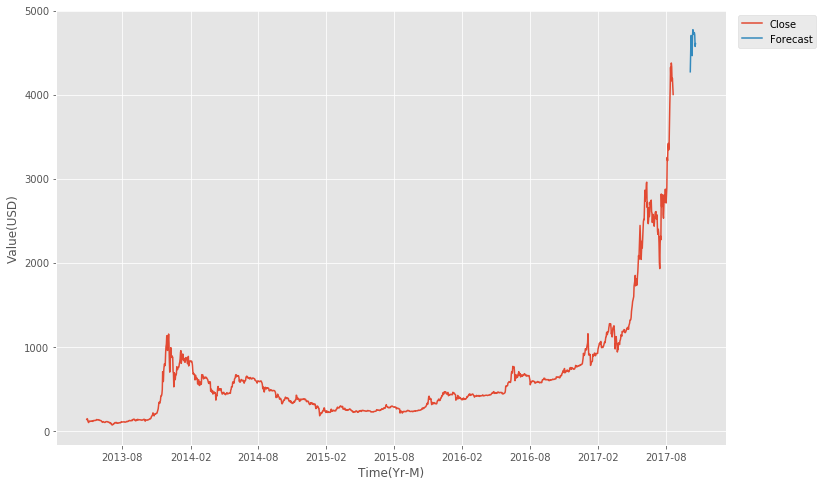

In [7]:
print('Gradient Boosting Regression model.')
gradient_boosting_regressor = models.GBR(x_train, y_train, x_test, y_test, x_recent)
print('Gradient Boosting Regression model selected.\n')

# train
print('Training initiated...\n')
gradient_boosting_regressor.train()

# test
print('\nEvaluating model on test data...\n')
gradient_boosting_regressor.test()

# predict
print('\nPredicting future values...\n')
preds = gradient_boosting_regressor.predict()

# graph predictions
print('Forecast Plot')
utils.forecast_plot(df, preds)

In [ ]:
"""
Choose model type:
1. Linear Regression
2. Support Vector Regression
3. Multilayer Perceptron
4. Gradient Boosting Regression
"""
print('Choose Model: [1]Linear Regression [2]Support Vector Regression [3]MLP [4]Gradient Boosting\n')
# choice = int(input())
choice = 4

if choice == 1: 
    model = models.LR(x_train, y_train, x_test, y_test, x_recent)
    print('Linear Regression model selected.\n')
elif choice == 2:
    model = models.SVR(x_train, y_train, x_test, y_test, x_recent)
    print('Support Vector Regression model selected.\n')
elif choice == 3:
    model = models.MLP(x_train, y_train, x_test, y_test, x_recent)
    model.build()
    print('Multilayer Perceptron model selected.\n')
elif choice == 4:
    model = models.GTBR(x_train, y_train, x_test, y_test, x_recent)
    print('Gradient Boosting Regression model selected.\n')

""" 
Choose operation type:
1. Train the model on training set
2. Evaluate metric on test set
3. Forecast prediction 
"""
print('Choose op: [1]Train, [2]Test, [3]Predict.\n')
# op = int(input())
op = 1

if op == 1:
    print('Training initiated...\n')
    model.train()
elif op == 2:
    print('Evaluating model on test data...\n')
    model.test()
elif op == 3:
    print('Predicting future values...\n')
    preds = model.predict()
    print('Forecast Plot')
    utils.forecast_plot(df, preds)

# Graph Visualization

In [3]:
# Visualization
currencies = visuals.load()

# Target currency type and target feature(s)
coin_type = 'bitcoin'
coin_feat = ['Close']

In [ ]:
print('Choose Graph Type: [1]Trend Curve [2]Candlestick [3]Correlation Map')
choice = int(input())
if choice == 1:
    visuals.plot_trend(currencies, coin_type, coin_feat)
elif choice == 2:
    visuals.plot_candlestick(currencies, coin_type, coin_feat)
elif choice == 3:
    print('Choose correlation type: [1]Spearman [2]Pearson [3]Kendall')
    corr_choice = int(input())
    if choice == 1:
        visuals.plot_correlation('spearman')
    elif choice == 2:
        visuals.plot_correlation('pearson')
    elif choice == 3:
        visuals.plot_correlation('kendall')

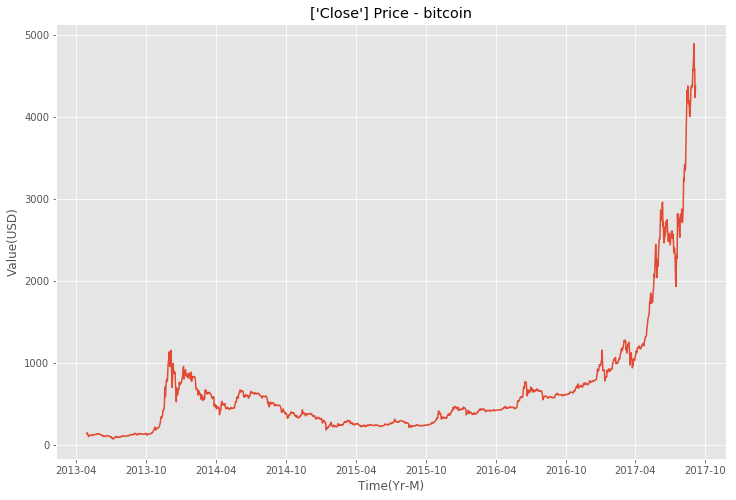

In [6]:
# Trend curve
visuals.plot_trend(currencies, coin_type, coin_feat)

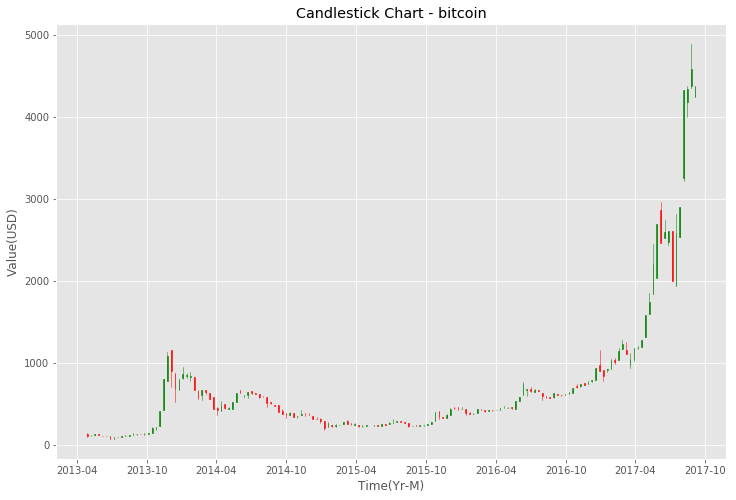

In [7]:
# candlestick graph
visuals.plot_candlestick(currencies, coin_type, coin_feat)

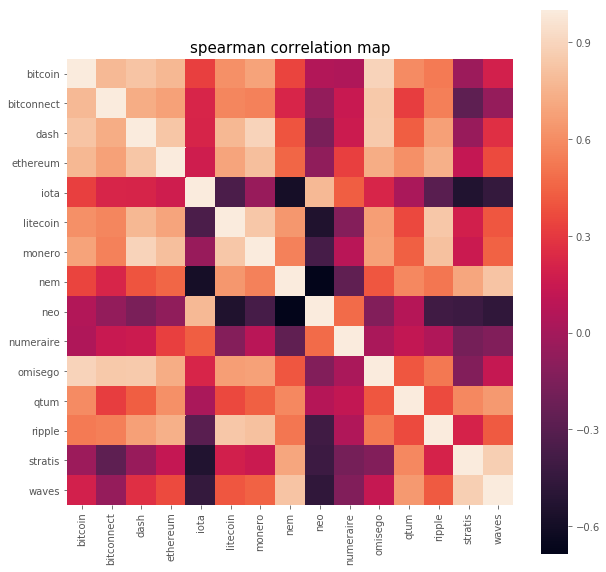

In [5]:
# spearman correlation
visuals.plot_correlation('spearman')

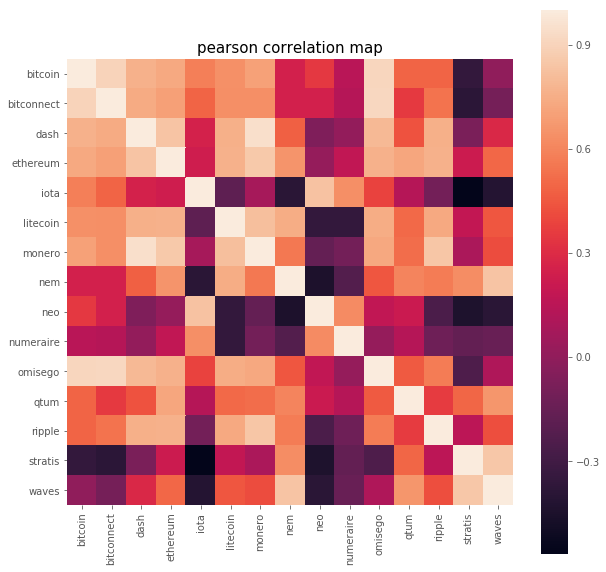

In [4]:
# pearson correlation
visuals.plot_correlation('pearson')

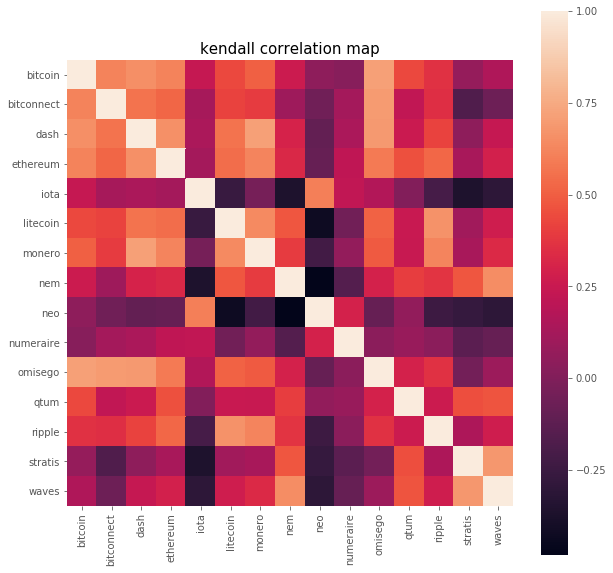

In [8]:
# kendall correlation
visuals.plot_correlation('kendall')